In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import keras
from keras import layers, optimizers, models
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

import numpy as np
import time

import csv
import random

In [30]:
DTdata = []
directoryDT = './sequenceData/processedDataDonaldTrump.csv'
#DTdata_pd = pd.read_csv(directoryDT, delimiter='|')
with open(directoryDT, 'r') as csvfile:
    spamreader = csv.reader(csvfile, delimiter='|')
    for row in spamreader:
        if row !=[]:
            r=[]
            for col in row:
                r.append(float(col))      
            DTdata.append(np.array(r))
    csvfile.closed


NotDTdata = []    
directoryNotDT = './sequenceData/NOTrealDonaldTrump_tweetsSequence.csv'
#NotDTdata_pd = pd.read_csv(directoryDT, delimiter='|')
with open(directoryNotDT, 'r') as csvfile:
    spamreader = csv.reader(csvfile, delimiter='|')
    for row in spamreader:
        if row !=[]:
            r=[]
            for col in row:
                r.append(float(col))
            NotDTdata.append(np.array(r))   
    csvfile.closed

In [41]:
#data to np array
DTdata_np = np.array(DTdata)
NotDTdata_np = np.array(NotDTdata)

#get max length
maxLengthDT = len(max(DTdata_np, key=len))
maxLengthNotDT = len(max(NotDTdata_np, key=len))
maxLength = max([maxLengthDT, maxLengthNotDT])

#make zeros matrixes
x_data_DT = np.zeros((len(DTdata_np), maxLength))
x_data_NotDT = np.zeros((len(NotDTdata_np), maxLength))
x_data_DT_oneHot = []
x_data_NotDT_oneHot = []

#fill the rows with the rows from the data
for i in range(len(DTdata_np)):   
    newOneHot = []
    x_data_DT[i, :len(DTdata_np[i])] = DTdata_np[i]
    for e in x_data_DT[i]:
        newOneHot.append(to_categorical(e, num_classes=47))
    x_data_DT_oneHot.append(np.array(newOneHot))
    
for i in range(len(NotDTdata_np)):   
    newOneHot = []
    x_data_NotDT[i, :len(NotDTdata_np[i])] = NotDTdata_np[i]
    for e in x_data_NotDT[i]:
        newOneHot.append(to_categorical(e, num_classes=47))
    x_data_NotDT_oneHot.append(np.array(newOneHot))

x_data_DT_oneHot = np.array(x_data_DT_oneHot)
x_data_NotDT_oneHot = np.array(x_data_NotDT_oneHot)
    

#augmentation 100% more data... party, create random sentences which have a bad language
x_data_DT_aug = np.zeros((len(DTdata_np), maxLength))
x_data_NotDT_aug = np.zeros((len(NotDTdata_np), maxLength))
x_data_DT_oneHot_aug = []
x_data_NotDT_oneHot_aug = []

for i in range(len(DTdata_np)): 
    newOneHot = []
    row = np.array(DTdata_np[i], copy=True)  
    np.random.shuffle(row)  
    x_data_DT_aug[i, :len(row)] = row
    for e in x_data_DT_aug[i]:
        newOneHot.append(to_categorical(e, num_classes=47))
    x_data_DT_oneHot_aug.append(np.array(newOneHot))
    
for i in range(len(NotDTdata_np)): 
    newOneHot = []
    row = np.array(NotDTdata_np[i], copy=True)  
    np.random.shuffle(row) 
    x_data_NotDT_aug[i, :len(row)] = row
    for e in x_data_NotDT_aug[i]:
        newOneHot.append(to_categorical(e, num_classes=47))
    x_data_NotDT_oneHot_aug.append(np.array(newOneHot))

x_data_DT_oneHot_aug = np.array(x_data_DT_oneHot_aug)
x_data_NotDT_oneHot_aug = np.array(x_data_NotDT_oneHot_aug)

#make dt tweets 1 and not dt tweets 0 label 2 for random data
labelsDT = np.zeros(  (len(x_data_DT),1)  )

labelsNotDT = np.zeros((len(x_data_NotDT),1))
labelsNotDT[:]=1

labelsRandomData1 = np.zeros( (len(DTdata_np),1)  )
labelsRandomData1[:]=2

labelsRandomData2 = np.zeros( (len(NotDTdata_np),1)  )
labelsRandomData2[:]=2

#glue the lables and data for random not dt and random dt together
labels_RD = np.concatenate([labelsRandomData1,labelsRandomData2])
data_RD = np.concatenate([x_data_DT_oneHot_aug, x_data_NotDT_oneHot_aug])

#make a validation set for all labels
x_train_DT, x_validation_DT, y_train_DT, y_validation_DT = train_test_split(
    x_data_DT_oneHot, labelsDT, test_size=0.1, random_state=2)

x_train_NotDT, x_validation_NotDT, y_train_NotDT, y_validation_NotDT = train_test_split(
    x_data_NotDT_oneHot, labelsNotDT, test_size=0.1, random_state=2)

x_train_RD, x_validation_RD, y_train_RD, y_validation_RD = train_test_split(
    data_RD, labels_RD, test_size=0.1, random_state=2)

x_train_RD1, x_validation_RD1, y_train_RD1, y_validation_RD1 = train_test_split(
    x_data_DT_oneHot_aug, labelsRandomData1, test_size=0.1, random_state=2)

x_train_RD2, x_validation_RD2, y_train_RD2, y_validation_RD2 = train_test_split(
    x_data_NotDT_oneHot_aug, labelsRandomData2, test_size=0.1, random_state=2)


# #add labels to the data
# data_DT = np.concatenate([y_train_DT, x_train_DT], axis=1)
# data_NotDT = np.concatenate([y_train_NotDT, x_train_NotDT], axis=1)
# data_RandomData = np.concatenate([y_train_RD, x_train_RD], axis=1)
# data_RandomData1 = np.concatenate([y_train_RD1, x_train_RD1], axis=1)
# data_RandomData2 = np.concatenate([y_train_RD2, x_train_RD2], axis=1)


# #sample data
# #data = np.concatenate([data_DT, data_NotDT,data_RandomData])
# #numberOfLabels = 3

# #without augmentation
# #data = np.concatenate([data_DT, data_NotDT])
# #numberOfLabels = 2

# #DT and shuffle DT
# data = np.concatenate([data_DT, data_NotDT])
# numberOfLabels = 2

# #shuffle data
# np.random.shuffle(data)

In [51]:
y_data = np.concatenate([y_train_DT, y_train_NotDT, y_train_RD])
x_data = np.concatenate([x_train_DT, x_train_NotDT, x_train_RD])
indxs = np.arange(len(y_data))
np.random.shuffle(indxs)

y_data = y_data[indxs]
x_data = x_data[indxs]

In [57]:

x_data = x_data.reshape(-1, 70, 47)

N = 3
# split train and validationy_train
x_train, x_validation, y_train, y_validation = train_test_split(x_data, y_data, test_size=0.1, random_state=2)
y_train_onehot = to_categorical(y_train, num_classes=N)
y_validation_onehot = to_categorical(y_validation, num_classes=N)

# reshape and onehot for the 3 label validation sets
x_validation_DT = x_validation_DT.reshape(-1, 70, 47)
x_validation_NotDT = x_validation_NotDT.reshape(-1, 70, 47)
x_validation_RD = x_validation_RD.reshape(-1, 70, 47)
x_validation_RD1 = x_validation_RD1.reshape(-1, 70, 47)
x_validation_RD2 = x_validation_RD2.reshape(-1, 70, 47)
y_validation_onehot_DT = to_categorical(y_validation_DT, num_classes=N)
y_validation_onehot_NotDT = to_categorical(y_validation_NotDT, num_classes=N)
y_validation_onehot_RD = to_categorical(y_validation_RD, num_classes=N)

y_validation_onehot_RD1 = to_categorical(y_validation_RD1, num_classes=2)
y_validation_onehot_RD2 = to_categorical(y_validation_RD2, num_classes=2)


(153938, 70, 47)
(153938, 70, 47)


In [58]:
print(maxLength)
print(x_data.shape)
print(x_train.shape)
print(x_validation.shape)

print(x_validation_DT.shape, y_validation_onehot_DT.shape)
print(x_validation_NotDT.shape, y_validation_onehot_NotDT.shape)
print(x_validation_RD.shape, y_validation_onehot_RD.shape)

70
(153938, 70, 47)
(138544, 70, 47)
(15394, 70, 47)
(3389, 70, 47) (3389, 3)
(5164, 70, 47) (5164, 3)
(8553, 70, 47) (8553, 3)


In [72]:
def generate_model(numberOfLabels):
    # Initialize the model to have sequential forward propagation
    network = models.Sequential() 
    
    # Define model's architecture    
#     network.add(layers.Conv1D(
#     filters=64,
#     kernel_size= 2,
#     padding='Same',
#     strides=1,
#     activation='relu',
#     input_shape=(68,1),
#     kernel_initializer='he_normal',
#     bias_initializer='zeros'
#     ))
    
#     network.add(layers.Conv1D(
#     filters=64,
#     kernel_size=3,
#     padding='Same',
#     strides=1,
#     activation='relu',
#     kernel_initializer='he_normal',
#     bias_initializer='zeros'
#     ))
    
    network.add(layers.Conv1D(
    filters=64,
    kernel_size=5,
    padding='Same',
    strides=1,
    input_shape=(70,47),
    activation='relu',
    kernel_initializer='he_normal',
    bias_initializer='zeros'
    ))
    
    network.add(layers.Conv1D(
    filters=64,
    kernel_size=7,
    padding='Same',
    strides=1,
    activation='relu',
    kernel_initializer='he_normal',
    bias_initializer='zeros'
    ))
    
#     network.add(layers.Conv1D(
#     filters=64,
#     kernel_size=9,
#     padding='Same',
#     strides=1,
#     activation='relu',
#     kernel_initializer='he_normal',
#     bias_initializer='zeros'
#     ))
    
    network.add(layers.Flatten())
    
    network.add(layers.BatchNormalization())
    
    network.add(layers.Dropout(0.3))
    
    network.add(layers.Dense(
    N,
    activation='softmax',
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros'
    ))
    
    return network

In [77]:
#create callback
model_name = './sequenceData/Model/LanguageClassification-v1.0'
checkpoint = ModelCheckpoint(model_name,
                             monitor = 'val_loss', 
                             verbose = 1, 
                             save_best_only = True,
                             mode = 'min',
                             period = 1)

# learning rate and decay
learning_rate = 0.01
decay = 1e-3

# optimizer
optimizer = optimizers.Adam()

# loss
loss = "categorical_crossentropy"

# metrics
metrics = ["categorical_accuracy"]

# dropout
dropout = 0.3

# compile the model
model = generate_model(numberOfLabels)
model.compile(optimizer, loss, metrics)


In [78]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 70, 64)            15104     
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 70, 64)            28736     
_________________________________________________________________
flatten_5 (Flatten)          (None, 4480)              0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 4480)              17920     
_________________________________________________________________
dropout_5 (Dropout)          (None, 4480)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 13443     
Total params: 75,203
Trainable params: 66,243
Non-trainable params: 8,960
_________________________________________________________________


Train on 138544 samples, validate on 15394 samples
Epoch 1/30
138544/138544 [==============================] - 69s 495us/step - loss: 1.0162 - categorical_accuracy: 0.5223 - val_loss: 0.8814 - val_categorical_accuracy: 0.5741

Epoch 00001: val_loss improved from inf to 0.88142, saving model to ./sequenceData/Model/LanguageClassification-v1.0
Epoch 2/30
138544/138544 [==============================] - 69s 501us/step - loss: 0.7028 - categorical_accuracy: 0.6966 - val_loss: 0.7450 - val_categorical_accuracy: 0.6453

Epoch 00002: val_loss improved from 0.88142 to 0.74504, saving model to ./sequenceData/Model/LanguageClassification-v1.0
Epoch 3/30
138544/138544 [==============================] - 69s 498us/step - loss: 0.5280 - categorical_accuracy: 0.7713 - val_loss: 0.6597 - val_categorical_accuracy: 0.6750

Epoch 00003: val_loss improved from 0.74504 to 0.65966, saving model to ./sequenceData/Model/LanguageClassification-v1.0
Epoch 4/30
138544/138544 [==============================] - 70

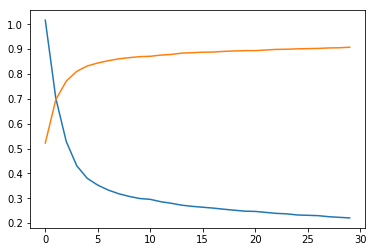

Epochs 30 
 Batch_size = 10000 
 learning_rate = 0.01 decay = 0.001 Dropout = 0.3 Time elapsed (min): 33.50628256400426


In [79]:
n_epochs = 30
batch_size = 10000

tra_losses = []
tra_accus = []

start_time = time.time()
# train the model
# for e in range(n_epochs):
results = model.fit(x_train, y_train_onehot, 
                    epochs=n_epochs, 
                    batch_size=batch_size, 
                    validation_data=(x_validation, y_validation_onehot),
                   callbacks = [checkpoint] )
    
tra_losses = results.history['loss']
tra_accus = results.history['categorical_accuracy']

elapsed_t = time.time() - start_time
plt.plot(tra_losses)
plt.plot(tra_accus)
plt.show()

print("Epochs {} \n Batch_size = {} \n learning_rate = {} decay = {} Dropout = {} Time elapsed (min): {}".format(
    n_epochs, batch_size, learning_rate, decay, dropout, elapsed_t/60))

In [1]:
print("scores_full_data")
scores = model.evaluate(x_validation, y_validation_onehot) 
print("loss", scores[0])
print("accuracy", scores[1])

print("\n")
print("scores_DT")
scores_DT = model.evaluate(x_validation_DT, y_validation_onehot_DT) 
print("loss", scores_DT[0])
print("accuracy", scores_DT[1])


print("\n")
print("scores_NotDT")
scores_NotDT = model.evaluate(x_validation_NotDT, y_validation_onehot_NotDT) 
print("loss", scores_NotDT[0])
print("accuracy", scores_NotDT[1])

print("\n")
print("scores_RD")
scores_RD = model.evaluate(x_validation_RD, y_validation_onehot_RD) 
print("loss", scores_RD[0])
print("accuracy", scores_RD[1])

print("\n")
print("scores_RD1")
scores_RD1 = model.evaluate(x_validation_RD1, y_validation_onehot_RD1) 
print("loss", scores_RD1[0])
print("accuracy", scores_RD1[1])

print("\n")
print("scores_RD2")
scores_RD2 = model.evaluate(x_validation_RD2, y_validation_onehot_RD2) 
print("loss", scores_RD2[0])
print("accuracy", scores_RD2[1])

scores_full_data


NameError: name 'model' is not defined